<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Introduction to Clustering and K-Means

_Authors: Tim Book (DC), Dave Yerrington (SF), Joseph Nelson (DC)_

---

![](https://snag.gy/kYWumd.jpg)

# Learning Objectives
*After this lesson, you will be able to:*
- Understand basic unsupervised clustering problems
- Perform a K-Means Clustering Analysis
- Evaluate clusters for fit 

## Lesson Guide
- [Unsupervised learning](#unsupervised)
- [Introduction to clustering](#intro)
- [Uses for Clustering](#uses)
- [What is clustering?](#what)
- [KNN review](#knn)
- [Clustering algorithms](#algos)
- [K-means clustering](#k-means)
- [K-Means step-by-step](#km-steps)
- [K-Means: a visual example](#vis)
- [K-Means caveats and pitfalls](#caveats)
- [Centroid Initialization](#init-centroid)
- [Choosing K](#choose-k)
- [A note on K-Means convergence](#converge)
- [K-Means in sklearn](#sklearn)
- [Metrics: inertia and the silhouette coefficient](#sil)
- [Practice: use K-Means on the "Isotopic Composition Plutonium Batches" data](#pluto)
    - [How does scaling affect fit?](#scaling)
- [Conclusion: K-Means tradeoffs](#conclusion)
- [Additional resources](#resources)

<a id='unsupervised'></a>

## Unsupervised learning

---

Up until now, we've been doing **supervised learning** - that is, modeling of the form:

> Given X, predict Y

Supervised learning comes in two flavors: can you remind me what they are? And how are they different? (prompt)

When we don't have a Y variable to predict, we are in the realm of **unsupervised learning**. Since there is no Y variable, unsupervised learning has no measurable "goal". Instead, unsuprvised learning seeks to **represent the data in new ways**. Today we're introducing **clustering**, however there are many other types of unsupervised learning.

> Data that don't have a natural Y variable are sometimes referred to as **unlabeled** data. This is because the Y variable is often refered to as a **label**.

## New Issues
Since there is no Y variable to "supervise" our learning, unsupervised learning presents us with some new issues we've never had to work through:

* **What is "correct"?** Since there's no Y variable, we don't have an easy to way know if we're even doing a good job.
* **Tuning parameter selection.** Many unsupervised models have tuning parameters. How do we tune them if we don't know how to evaluate our model?
* **Unpredictability (clustering).** In clustering, it is very difficult to predict what our model will give us. It's possible that a clustering algorithm won't give us actionable results. More on this later.

<a name="intro"></a>
# Introduction to Clustering

---

**Clustering** is a task in which we seek to group our observations in **homogenous clusters**. Since it's unsupervised, it is up to us, the data scientists, to decide what we mean by "homogenous".

<a name="uses"></a>
## Uses for Clustering
### Marketing
Marketing teams do a lot of data-driven research into who does and does not buy their product (and why). As a marketing data scientist, you might collect demographic information about people in a survey and their spending habits. After clustering, you do some EDA and you might discover:

> People in Cluster A aren't buying our product, but people in Cluster B are. Why?

After some digging, you might make the conclusion and recommendation:

> People in Cluster A have characteristic X, but people in Cluster B do not. In order to sell to Cluster A, we should target our marketing with respect to X.

Maybe X = 
* They don't have cable
* Their political beliefs
* They live in cities


<img src="https://snag.gy/BdfATE.jpg" style="width: 500px">

### Political Polling
In the same vein as the above example, instead of buying a product, maybe it's **voting for a certain candidate**.

The popular data-drive journalism website, FiveThirtyEight is doing a lot of research into the upcoming 2020 Democratic primary season. They have used (probably subjective) clustering techniques to divide Democratic voters into five clusters:

* Party Loyalists
* The Left
* Millennials and Friends
* Black voters
* Hispanic voters (sometimes in combination with Asian voters)

They then graded each candidate based on their favorability of these clusters:

<!-- <img src="../assets/imgs/five-corners.png"> -->
![](../assets/imgs/five-corners.png)

Their methodology is probably more subjective than scientific, but it still provides a good example into how real political polling works. You can read more about it [here](https://fivethirtyeight.com/features/the-5-key-constituencies-of-the-2020-democratic-primary/).

## Recommender Systems
Online retailers cluster their items by similarity. If you buy (or search for) a few items in a given cluster, they may recommend you other similar items in that same cluster.

![](../assets/imgs/recs.png)

<img src="https://snag.gy/YUt5RO.jpg" style="float: left; margin-right: 25px; width: 250px">

## What other problems do you think can make use of clustering?

(thread)

<a name="algos"></a>
# Clustering algorithms 

---

The are many different algorithms that can perform clustering given a dataset:

- **K-Means** (mean centroids)
- **Hierarchical** (nested clusters by merging or splitting successively)
- **DBSCAN** (density based)
- **Affinity Propagation** (graph based approach to let points 'vote' on their preferred 'exemplar')
- **Mean Shift** (can find number of clusters)
- **Spectral Clustering**
- **Agglomerative Clustering** (suite of algorithms all based on applying the same criteria/characteristics of one cluster to others)



Today we're going to look only at one of the algorithms: **k-means**.

<a id='k-means'></a>
# K-Means clustering

---

#### K-Means is the most popular clustering algorithm

K-means is one of the easier methods to understand and other clustering techniques use some of the same assumptions that k-means relies on.

- **k** is the number of clusters.
- **Means** refers to the mean points of the k clusters.

The goal is to partition the data into set such that the total sum of squared distances from each point to the mean point of the cluster is minimized.

**You must choose $k$, the number of clusters, in advance.** Note that this is a huge issue, since we rarely have an intuition for this number. And since we're in unsupervised territory, it's hard for us to know if we've picked correctly! We'll talk about how to pick $k$ later.

The algorithm takes your entire dataset and iterates over its features and observations to determine clusters based around center points. These center points are known as **centroids**. 

**K-means iterative fitting:**
1. Pick a value for k (the number of clusters to create)
2. Initialize $k$ 'centroids' (starting points) in your data
3. Create your clusters. Assign each point to the nearest centroid. 
4. Make your clusters better. Move each centroid to the center of its cluster. 
5. Repeat steps 3-4 until your centroids converge. 

> Check out a demo of this algorithm [here](https://www.naftaliharris.com/blog/visualizing-k-means-clustering/)!

<a id='caveats'></a>
## Sounds great - what could go wrong?

---

Now that we've learned the basic process for K-Means clustering, we should explore the idea that nothing's perfect!  Let's play a game called **"How will it converge!?"**.

### Scenario 1: Wispy Flat Blobs
![](../assets/imgs/stripes.png)

### Scenario 2:  The Lone Wolf Point
![](../assets/imgs/lone-wolf.png)

### Scenario 3: When it doesn't make sense to cluster at all!
In general, k-means will converge to a solution and return a partition of k clusters, even if no natural clusters exist in the data.  It's entirely possible – in fact, *common* – that the clusters do not mean anything at all. 
![](../assets/imgs/blob.png)

### How many K?

Sometimes it's obvious, sometimes it's not!  What do you think?

- /poll "How many K:  Figure 1" "1" "2" "3" "4"
- /poll "How many K:  Figure 2" "1" "2" "3" "4"
- /poll "How many K:  Figure 3" "1" "2" "3" "4"

<table>
    <tr>
        <td valign="bottom" style="vertical-align: bottom; text-align: center;"><img src="http://i.stack.imgur.com/4rU39.png"><br>1</td>
        <td valign="bottom" style="vertical-align: bottom; text-align: center;"><img src="http://i.stack.imgur.com/gq28F.png"><br>2</td>
        <td valign="bottom" style="vertical-align: bottom; text-align: center;"><img src="https://snag.gy/cWPgno.jpg"><br>3</td>
    </tr>
</table>

<a name="init-centroid"></a>
## Initializing Centroids

---

There are different methods of initializing centroids. For instance:

- Randomly
- Manually
- Special KMeans++ method in Sklearn (_This initializes the centroids to be generally distant from each other_)

**Depending on your problem, you may find some of these are better than others.**

> **Note:** Manual is recommended if you know your data well enough to see the clusters without much help, but rarely used in practice.

<a id='choose-k'></a>
## Choosing $k$
This still remains an open question. Afterall we're tuning a tuning parameter with no metric for success! Here are three ideas:

* Make an educated guess
    - Industry knowledge (there are five kinds of Democrats...)
    - Visualization (probably impossible if you have more than 2 variables)
* Judge based on a pseudo-evaluation metric, like the **silhouette score**.
* If you're using the resulting cluster labels as input to a supervised learning method later, you can tune $k$ to have the best supervised learning model. This is **transfer learning**.

<a id='converge'></a>
## A note on K-Means convergence

---

**Knowing your domain and dataset is essential. Evaluating the clusters visually is a must (if possible).**

> _"Given enough time, k-means will always converge, however this may be to a local minimum. This is highly dependent on the initialization of the centroids. As a result, the computation is often done several times, with different initializations of the centroids. One method to help address this issue is the k-means++ initialization scheme, which has been implemented in scikit-learn (use the init='kmeans++' parameter). This initializes the centroids to be (generally) distant from each other, leading to provably better results than random initialization, as shown in the reference."_ [sklearn Clustering Guide](http://scikit-learn.org/stable/modules/clustering.html#k-means)

![](http://www.datamilk.com/kmeans_animation.gif)

<a name="sklearn"></a>
## K-Means in sklearn

---

Below we will implement K-Means using sklearn.

In [1]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

matplotlib.style.use('ggplot')

# Let's make some more blobs to test K-Means on
X, color = make_blobs(n_samples=100, random_state=29, centers=3, cluster_std=1.5)
X = map(lambda x: (x[0][0], x[0][1]), zip(X, color))

df = pd.DataFrame(list(X), columns=["x1", "x2"])
df.head()

,x1,x2
0,7.081642,-5.248171
1,-3.036735,-0.129646
2,5.117565,-3.323573
3,-1.807058,-0.335986
4,4.519789,-5.469635


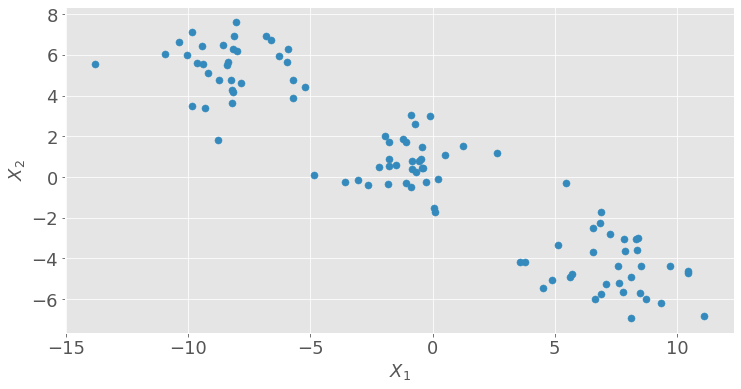

In [2]:
# Plot the scatter
ax = df.plot(kind="scatter", x="x1", y="x2", figsize=(12,6), s=50)
plt.xlabel("$X_1$", fontsize=18)
plt.ylabel("$X_2$", fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=18)

In [3]:
# Let's prepare our X matrix
X = df.loc[:, ['x1', 'x2']]
sc = StandardScaler()
X_sc = sc.fit_transform(X)

In [4]:
# (thread) How many K here?
# I do: Fit a k-means clustering model
km = KMeans(n_clusters=3, random_state=42)
km.fit(X_sc)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

After we fit our data, we can get our predicted labels from `model.labels_` and the center points`model.cluster_centers_`.

In [5]:
# Check out centroids
km.cluster_centers_

array([[-0.0338285 ,  0.03008366],
       [ 1.20438571, -1.19244188],
       [-1.16953211,  1.16144659]])

In [6]:
# Option 1: Class attribute
km.labels_

array([1, 0, 1, 0, 1, 2, 0, 2, 1, 0, 1, 0, 0, 0, 0, 0, 2, 1, 2, 0, 1, 1,
       1, 0, 1, 2, 0, 1, 0, 2, 0, 0, 2, 0, 2, 0, 2, 0, 2, 0, 1, 2, 0, 2,
       2, 2, 1, 0, 2, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 1, 2, 2, 0, 0, 1, 2,
       2, 1, 0, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 2, 0, 0, 1, 0, 2, 2, 2,
       1, 1, 0, 0, 2, 2, 2, 1, 2, 2, 1, 0], dtype=int32)

In [7]:
# Option 2: Predict
km.predict(X_sc)

array([1, 0, 1, 0, 1, 2, 0, 2, 1, 0, 1, 0, 0, 0, 0, 0, 2, 1, 2, 0, 1, 1,
       1, 0, 1, 2, 0, 1, 0, 2, 0, 0, 2, 0, 2, 0, 2, 0, 2, 0, 1, 2, 0, 2,
       2, 2, 1, 0, 2, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 1, 2, 2, 0, 0, 1, 2,
       2, 1, 0, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 2, 0, 0, 1, 0, 2, 2, 2,
       1, 1, 0, 0, 2, 2, 2, 1, 2, 2, 1, 0], dtype=int32)

In [8]:
# attach predicted cluster to original points
df['cluster'] = km.labels_
df.head()

,x1,x2,cluster
0,7.081642,-5.248171,1
1,-3.036735,-0.129646,0
2,5.117565,-3.323573,1
3,-1.807058,-0.335986,0
4,4.519789,-5.469635,1


In [9]:
km.cluster_centers_

array([[-0.0338285 ,  0.03008366],
       [ 1.20438571, -1.19244188],
       [-1.16953211,  1.16144659]])

In [10]:
# You do: Show me the mean values for x1 and x2 WITHIN EACH CLUSTER for our data. (thread)
df.groupby('cluster').mean()

,x1,x2
cluster,,
0,-0.808523,0.649190
1,7.423151,-4.492445
2,-8.358705,5.407417


### Visually verifying cluster labels

In [11]:
## Create a dataframe for cluster_centers (centroids)
centroids = pd.DataFrame(
    sc.inverse_transform(km.cluster_centers_),
    columns=["x1", "x2"]
)
centroids

,x1,x2
0,-0.808523,0.649190
1,7.423151,-4.492445
2,-8.358705,5.407417


<Figure size 504x504 with 0 Axes>

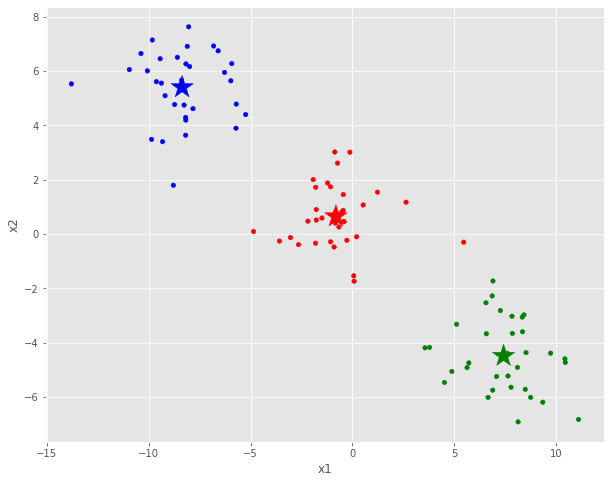

In [12]:
plt.figure(figsize=(7,7));

## Plot scatter by cluster / color, and centroids
colors = ["red", "green", "blue"]
df['color'] = df['cluster'].map(lambda p: colors[p])

ax = df.plot(    
    kind="scatter", 
    x="x1", y="x2",
    figsize=(10,8),
    c = df['color']
)

centroids.plot(
    kind="scatter", 
    x="x1", y="x2", 
    marker="*", c=["r", "g", "b"], s=550,
    ax=ax
);

<a id='sil'></a>

## Metrics: inertia and the silhouette score

---

**Inertia** -- sum of squared errors for each cluster.
- low inertia = dense cluster

> As the number of clusters k increases, inertia decreases. 

**Silhouette Score** 

- measure of how far apart clusters are
- high Silhouette = clusters are well separated

The Silhouette Score is the averge of Silhouette $s$ of each point within a cluster in relation to other clusters. The logic behind the solhouette score is that **cohesion** should be low, while **separation** should be high:

**cohesion** = Average distance of points within clusters

**separation** = Average distance of points in one cluster to points in other clusters

And it's calculated as:

$$s_i = \frac{b_i - a_i}{max\{a_i, b_i\}}$$

where:

* $a_i$ = Average distance from point $x_i$ to all other points **in the same cluster**.
* $b_i$ = Average distance from point $x_i$ to all points **in the next nearest cluster**.

And the resulting silhouette score is the average of all the $s_i$s.

* -1 = Bad

* 0 = Meh

* 1 = Good

The silhouette score evaluates the viability of your clusters. It is a way to quantify the "cohesion" of local points to their clusters and the separation to other clusters.

### Easy to calculate Silhouette in Scikit-Learn

In [13]:
from sklearn.metrics import silhouette_score
silhouette_score(X_sc, km.labels_)

0.6856685892164013

### Programatically Inspecting $k$

Since we're familliar with gridsearch now, let's try it out!  Gridsearch is typically used for supervised learning with some scoring objective for optimizing parameters in terms of `best_model`.  We don't really care about the best model as much as we want to see how either inertia or silhouette score changes based on $k$.

We will write a basic process for exploring inertia and silhouette, that you can feel free to adapt to any other ML process you might write in Sklearn for doing custom scoring (using GridsearchCV is better for supervised learning because it has cross validation built-in!).

> Visually inspecting your clusters is vastly superior to relying on programatic parameter searching for an ideal cluster for most data.  You can also invent your own evalutation metrics other than inertia or silhoette.  The world is also bigger than k-means when it comes to cluster applications.  It's a great first stop in your journey of clustering.

In [14]:
scores = []
for k in range(2, 31):
    cl = KMeans(n_clusters=k)
    cl.fit(X_sc)
    inertia = cl.inertia_
    sil = silhouette_score(X_sc, cl.labels_)
    scores.append([k, inertia, sil])
    
score_df = pd.DataFrame(scores)
score_df.columns = ['k', 'inertia', 'silhouette']

In [15]:
score_df.head()

,k,inertia,silhouette
0,2,56.111850,0.611233
1,3,15.485859,0.685669
2,4,12.586845,0.579278
3,5,10.470112,0.462238
4,6,8.746630,0.387903


Text(0.5, 1.0, 'Silhouette Score over k')

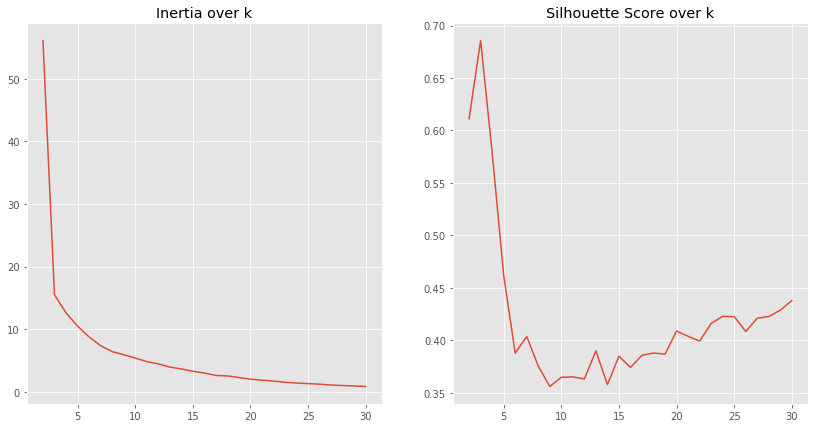

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(14, 7))
axes[0].plot(score_df.k, score_df.inertia)
axes[0].set_title('Inertia over k')
axes[1].plot(score_df.k, score_df.silhouette);
axes[1].set_title('Silhouette Score over k')

### Why is it called "silhouette" score?
![](../assets/imgs/silhouette.png)!

<a name="conclusion"></a>
## Conclusion: K-Means tradeoffs

---

**K-Means:**
- Unsupervised clustering model
- Iteratively finds labels given k
- Easy to implement in sklearn
- Sensitive to shape, scale of data **(!!!)**
- Optimal k hard to evaluate

---

| Strengths | Weaknesses |
| -- | -- |
| k-Means is popular because it's simple and computationally efficient. | However, k-Means is highly scale dependent and isn't suitable for data of varying shapes and densities. |
| Easy to see results / intuitive. | Evaluating results is more subjective, requiring much more human evaluation than trusted metrics. |

### K-Means is sensitive to outliers

![](https://snag.gy/WFNMQY.jpg)

### K-Means is sensitive to centroid initialization

![](https://snag.gy/5sigCD.jpg)

<a id='resources'></a>

## Additional resources

---

- Andrew Moore's CS class at Carnegie Mellon contains good static visualization, step-by-step. His slide deck is online here: https://www.autonlab.org/tutorials/kmeans11.pdf. He also links to more of his tutorials on the first page. 
- [Sci-Kit Learn Clustering Overview](http://scikit-learn.org/stable/modules/clustering.html#k-means)
- [SKLearn K-Means Documentation](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans)
- [SKLearn Clustering Code - See _k_init__ for explanation of k++ centroid selection](https://github.com/scikit-learn/scikit-learn/blob/51a765a/sklearn/cluster/k_means_.py#L769)
- [Clustering Tutorial](http://home.deib.polimi.it/matteucc/Clustering/tutorial_html/)
- [Wikipedia's Deep Dive on Clustering](https://en.wikipedia.org/wiki/K-means_clustering)
- [An excellent blog from Galvanize on K-Means Clustering](http://www.galvanize.com/blog/introduction-k-means-cluster-analysis/#.V9aXqpOAOkp)

**Some helpful stackexchange questions:**
- http://stats.stackexchange.com/questions/40613/why-dont-dummy-variables-have-the-continuous-adjacent-category-problem-in-clust
- http://stats.stackexchange.com/questions/174556/k-means-clustering-with-dummy-variables
- http://datascience.stackexchange.com/questions/22/k-means-clustering-for-mixed-numeric-and-categorical-data
- http://www-01.ibm.com/support/docview.wss?uid=swg21477401
